# Road Safety Portfolio Project
## Exploratory Data Analysis

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import operator

In [2]:
os.chdir("../data/initial_download/")

In [3]:
df = pd.read_csv('../../data_transformed/20170217_merged_dataset.csv',
                 dtype={'Accident_Index':str})

C:\Users\IBM_ADMIN\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(285509, 70)

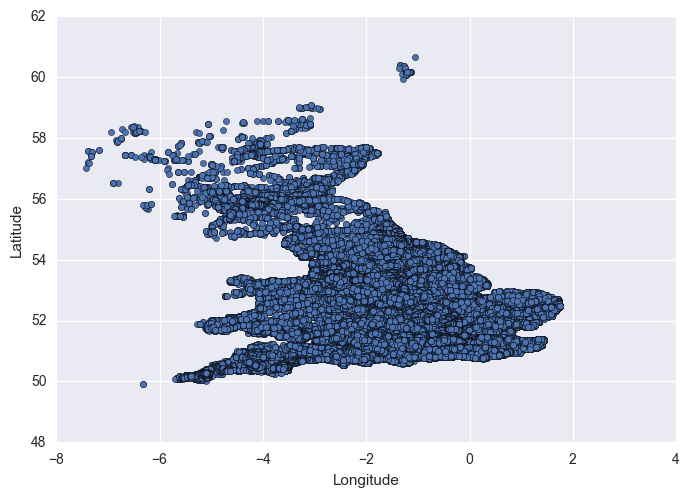

In [5]:
df.plot.scatter(x='Longitude', y='Latitude')

In [6]:
df.columns

Index([u'Unnamed: 0', u'Accident_Index', u'Location_Easting_OSGR',
       u'Location_Northing_OSGR', u'Longitude', u'Latitude', u'Police_Force',
       u'Accident_Severity', u'Number_of_Vehicles', u'Number_of_Casualties',
       u'Date', u'Day_of_Week', u'Time', u'Local_Authority_(District)',
       u'Local_Authority_(Highway)', u'1st_Road_Class', u'1st_Road_Number',
       u'Road_Type', u'Speed_limit', u'Junction_Detail', u'Junction_Control',
       u'2nd_Road_Class', u'2nd_Road_Number',
       u'Pedestrian_Crossing-Human_Control',
       u'Pedestrian_Crossing-Physical_Facilities', u'Light_Conditions',
       u'Weather_Conditions', u'Road_Surface_Conditions',
       u'Special_Conditions_at_Site', u'Carriageway_Hazards',
       u'Urban_or_Rural_Area', u'Did_Police_Officer_Attend_Scene_of_Accident',
       u'LSOA_of_Accident_Location', u'Vehicle_Reference',
       u'Casualty_Reference', u'Casualty_Class', u'Sex_of_Casualty',
       u'Age_of_Casualty', u'Age_Band_of_Casualty', u'Casualty

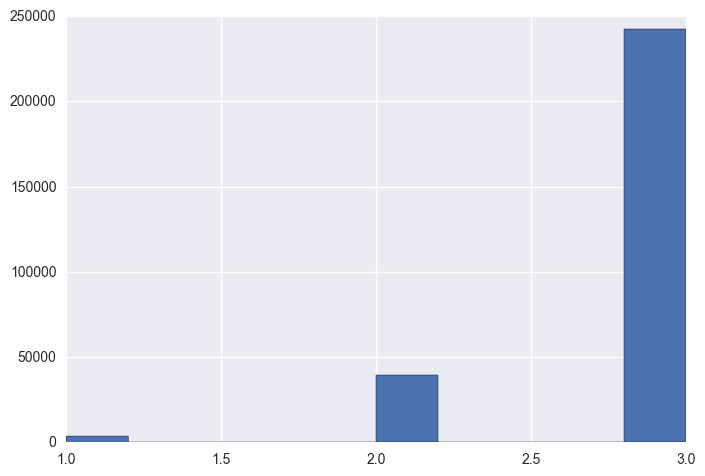

In [7]:
df['Accident_Severity'].hist()
# 1 - Fatal, 2 - Serious, 3 - Slight

([array([ 3206.,  1988.,  9750.,  7334.,  6516.,  6729.,  3847.,  2105.,
          1212.,   188.]),
  array([ 30549.,  11570.,  63539.,  55203.,  45072.,  41253.,  21529.,
          10920.,   5170.,    704.])],
 array([ -1. ,   8.8,  18.6,  28.4,  38.2,  48. ,  57.8,  67.6,  77.4,
         87.2,  97. ]),
 <a list of 2 Lists of Patches objects>)

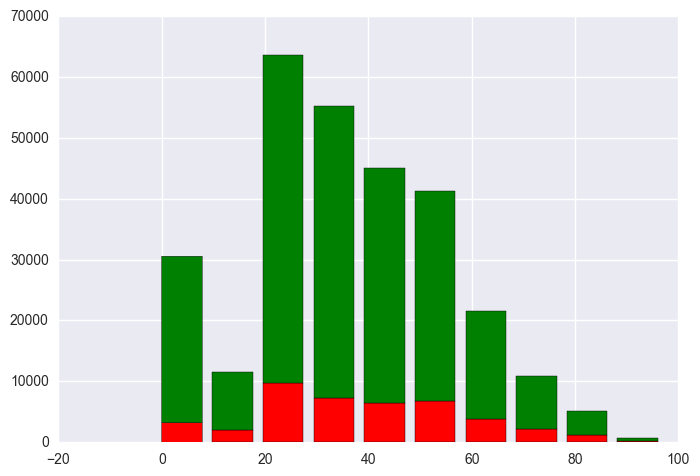

In [8]:
plt.hist(x=[df[df['Accident_Severity']!=3]['Age_of_Driver'], df[df['Accident_Severity']==3]['Age_of_Driver']],
        stacked=True, color=['r', 'g'])

In [9]:
speed_severity = pd.crosstab(index=df['Accident_Severity'],
                columns=df['Speed_limit'],
                normalize='columns')

speed_severity.index = [1, 2, 3]

speed_severity

Speed_limit,0,10,20,30,40,50,60,70
1,0.0,0.0,0.002562,0.005524,0.016450,0.020467,0.036355,0.022071
2,0.0,0.0,0.137458,0.117990,0.142654,0.151407,0.214935,0.137449
3,1.0,1.0,0.859980,0.876486,0.840897,0.828126,0.748710,0.840481


In [10]:
variable_to_inspect = 'Road_Surface_Conditions'

ct = pd.crosstab(index=df['Accident_Severity'],
                columns=df[variable_to_inspect],
                normalize='columns')

#ct.index = [1, 2, 3]

ct

#5=flood over 3cm deep

Road_Surface_Conditions,-1,1,2,3,4,5
Accident_Severity,,,,,,
1,0.005505,0.012069,0.014944,0.008704,0.008165,0.044510
2,0.051376,0.135531,0.143140,0.131528,0.137247,0.189911
3,0.943119,0.852401,0.841916,0.859768,0.854588,0.765579


In [11]:
variable_to_inspect = 'Weather_Conditions'

ct = pd.crosstab(index=df['Accident_Severity'],
                columns=df[variable_to_inspect],
                normalize='columns')

#ct.index = [1, 2, 3]

ct

# 7 = raining and high winds

Weather_Conditions,1,2,3,4,5,6,7,8,9
Accident_Severity,,,,,,,,,
1,0.012812,0.011437,0.001903,0.019296,0.010806,0.000000,0.051994,0.006686,0.012556
2,0.138583,0.130456,0.120837,0.166243,0.144370,0.162465,0.188746,0.119568,0.089594
3,0.848605,0.858108,0.877260,0.814461,0.844824,0.837535,0.759259,0.873746,0.897851


In [12]:
ct

Weather_Conditions,1,2,3,4,5,6,7,8,9
Accident_Severity,,,,,,,,,
1,0.012812,0.011437,0.001903,0.019296,0.010806,0.000000,0.051994,0.006686,0.012556
2,0.138583,0.130456,0.120837,0.166243,0.144370,0.162465,0.188746,0.119568,0.089594
3,0.848605,0.858108,0.877260,0.814461,0.844824,0.837535,0.759259,0.873746,0.897851


In [13]:
ct.iloc[2][5]

0.84482385995245302

In [14]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df['Bad_Accident'] = np.where(df['Accident_Severity']==1, 1, 0)

In [15]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,_merge,Bad_Accident
0,201501BS70001,525130.0,180050.0,-0.198465,51.505538,1,3,1,1,12/01/2015,...,-1,-1,2143,2,4,-1,-1,-1,both,0
1,201501BS70002,526530.0,178560.0,-0.178838,51.491836,1,3,1,1,12/01/2015,...,-1,-1,1600,1,3,-1,-1,-1,both,0
2,201501BS70004,524610.0,181080.0,-0.205590,51.514910,1,3,1,1,12/01/2015,...,30,6,1686,2,10,-1,1,-1,both,0
3,201501BS70005,524420.0,181080.0,-0.208327,51.514952,1,3,1,1,13/01/2015,...,-1,-1,-1,-1,-1,-1,-1,-1,both,0
4,201501BS70008,524630.0,179040.0,-0.206022,51.496572,1,2,2,1,09/01/2015,...,48,8,-1,-1,-1,-1,1,-1,both,0


Now attempting to produce code to automate the proportion checking

In [16]:
variable_to_inspect = 'Weather_Conditions'

ct = pd.crosstab(index=df['Bad_Accident'],
                columns=df[variable_to_inspect],
                normalize='columns')

#ct.index = [1, 2, 3]

ct

# 7 = raining and high winds

Weather_Conditions,1,2,3,4,5,6,7,8,9
Bad_Accident,,,,,,,,,
0,0.987188,0.988563,0.998097,0.980704,0.989194,1.0,0.948006,0.993314,0.987444
1,0.012812,0.011437,0.001903,0.019296,0.010806,0.0,0.051994,0.006686,0.012556


In [17]:
categorical_variables = [u'Police_Force', u'Number_of_Vehicles', 'Number_of_Casualties',
       'Day_of_Week', 'Local_Authority_(District)',
       'Local_Authority_(Highway)', '1st_Road_Class',
       'Road_Type', 'Speed_limit', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Casualty_Class', 'Sex_of_Casualty',
       'Age_Band_of_Casualty', u'Casualty_Severity',
       'Casualty_Type', 'Vehicle_Type',
       'Journey_Purpose_of_Driver', 'Sex_of_Driver', 
       'Age_Band_of_Driver', u'Engine_Capacity_(CC)', u'Propulsion_Code']

In [18]:
count = 0
prop_dict={}
for var in categorical_variables:
    
    ct = pd.crosstab(index=df['Bad_Accident'], columns=df[var], normalize='columns')
    
    for x in df[var].unique():
        prop = ct.iloc[1][x]
        
        key = str(var) + " = " + str(x)
        prop_dict[key] = prop

In [19]:
sorted(prop_dict.items(), key=lambda x:x[1])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [23]:
count = 0
for keyvalue in prop_dict:
    count = count + 1
print keyvalue.value()       

AttributeError: 'str' object has no attribute 'value'